
Naha hasil PCA manual sarua jeung Scikit-Learn? True
Explained Variance Ratio: [0.84248607 0.14631839]
Total varians nu dijaga: 0.988804464429311

Dimensi asli MNIST: 784
Dimensi sanggeus PCA 95%: 154

--- Latihan 9: PCA + Random Forest pada MNIST ---
Ngalatih RF dina data asli...
Waktu latihan (asli): 34.89 detik

Dataset MNIST teu dimuat, latihan 9 diskip.

--- Latihan 10: Visualisasi MNIST jeung t-SNE ---
Ngajalankeun t-SNE (ieu bisa lila)...


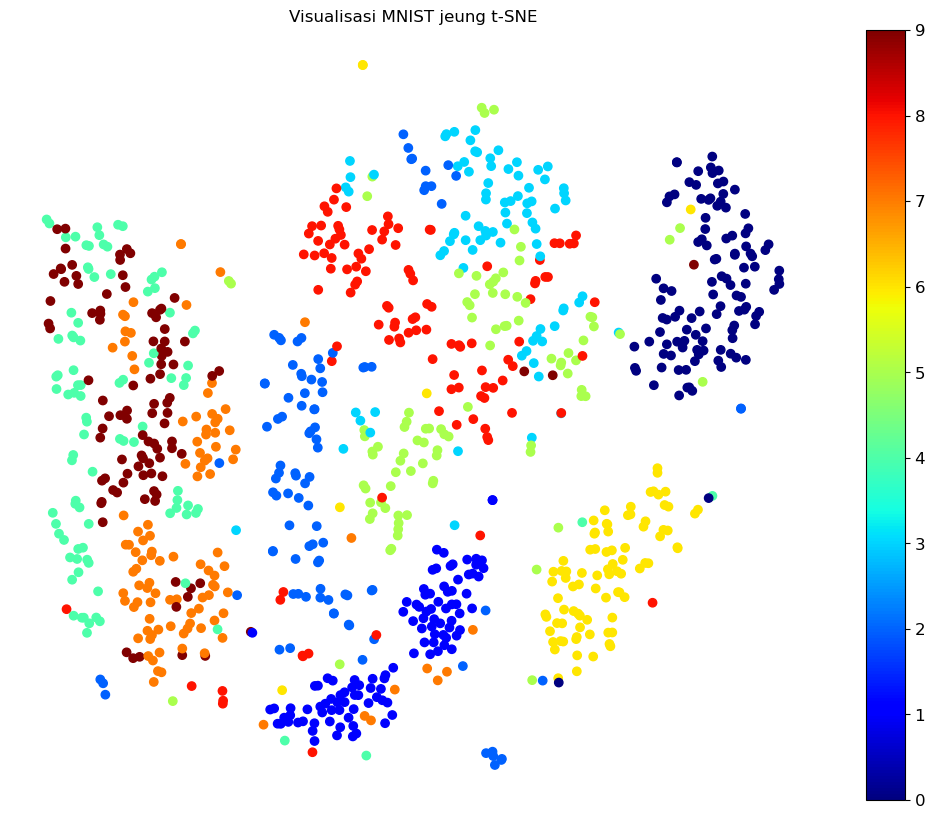

Hasilna nunjukkeun klaster angka anu misah cukup alus.


In [1]:
# --- SETUP AWAL ---
# Python ≥3.5 diperlukan
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 diperlukan
import sklearn
assert sklearn.__version__ >= "0.20"

# Impor library umum
import numpy as np
import pandas as pd
import os

# Untuk membuat plot yang konsisten
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Direktori untuk menyimpan gambar
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Menyimpan gambar", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

"""
# Bab 8: Dimensionality Reduction (Pengurangan Dimensi)

## Penjelasan Teoretis: Konsep Dasar
Loba masalah Machine Learning ngalibatkeun rébuan atawa jutaan fitur. Ieu nyababkeun latihan jadi lambat pisan jeung hésé manggihan solusi nu alus. Masalah ieu disebut **the curse of dimensionality** (kutukan dimensi).

Untungna, urang bisa ngurangan jumlah fitur sacara signifikan. Ngurangan dimensi bisa:
1.  **Ngagancangkeun latihan**: Ieu mangpaat utamana.
2.  **Visualisasi Data**: Ngurangan dimensi jadi 2D atawa 3D ngamungkinkeun urang pikeun ngagambar data jeung manggihan pola visual saperti klaster.

Tapi, aya ogé kalemahanana:
- **Leungitna informasi**: Proses ieu bisa ngaleungitkeun sababaraha informasi, nu mungkin bisa nurunkeun saeutik kinerja sistem.
- **Pipeline jadi leuwih kompléks**: Nambahan léngkah dina pipeline ngajadikeun sistem leuwih hésé pikeun dirawat.

Dua pendekatan utama pikeun ngurangan dimensi nyaéta **Projection** (Proyeksi) jeung **Manifold Learning**.
"""

# --- 1. Principal Component Analysis (PCA) ---
"""
PCA (Analisis Komponén Utama) nyaéta algoritma pangurangan dimensi anu pang populérna.
- **Ide Utama**: PCA néangan *hyperplane* (bidang) anu pangdeukeutna jeung data, tuluy memproyeksikan data ka hyperplane éta.
- **Tujuan**: Milih hyperplane anu bisa **ngajaga varians data sabisa mungkin**. Ngajaga varians hartina ngaleungitkeun saeutik mungkin informasi.

Sumbu-sumbu tina hyperplane ieu disebut **Principal Components (PC)**. PC kahiji nyaéta sumbu anu nangkep varians panglobana, PC kadua (anu tegak lurus jeung nu kahiji) nangkep varians sésa panglobana, jeung saterusna.
"""
# PCA sacara manual ngagunakeun SVD (Singular Value Decomposition)
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

# PCA ngabutuhkeun data nu geus dipuseurkeun (centered)
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

# Proyéksi data ka 2D
W2 = Vt.T[:, :2]
X2D_svd = X_centered.dot(W2)

"""
#### PCA jeung Scikit-Learn
Scikit-Learn nyadiakeun kelas `PCA` anu leuwih gampang dipaké. Kelas ieu otomatis ngurus *centering* data.
"""
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

print("\nNaha hasil PCA manual sarua jeung Scikit-Learn?", np.allclose(X2D, X2D_svd))

"""
#### Explained Variance Ratio
Rasio ieu nunjukkeun proporsi varians dataset anu aya di sapanjang unggal principal component. Ieu mantuan urang pikeun mutuskeun sabaraha dimensi anu rék dijaga.
"""
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total varians nu dijaga:", np.sum(pca.explained_variance_ratio_))

"""
#### Milih Jumlah Dimensi anu Pas
Daripada milih jumlah dimensi sacara acak, urang bisa milih jumlah dimensi anu bisa ngajaga persentase varians nu cukup (misalna 95%).
"""
# Muat dataset MNIST pikeun conto
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X_mnist, y_mnist = mnist["data"], mnist["target"]
    
    # Latih PCA pikeun manggihan jumlah dimensi nu ngajaga 95% varians
    pca_mnist = PCA(n_components=0.95)
    X_mnist_reduced = pca_mnist.fit_transform(X_mnist)
    print("\nDimensi asli MNIST:", X_mnist.shape[1])
    print("Dimensi sanggeus PCA 95%:", pca_mnist.n_components_)

except Exception as e:
    print(f"\nGagal ngamuat MNIST: {e}")

"""
#### PCA pikeun Komprési
PCA bisa dipaké pikeun ngomprési data. Sanggeus dikomprési, data bisa didekomprési deui ngagunakeun `inverse_transform()`. Hasilna moal persis sarua jeung data asli, tapi bakal deukeut.
"""
# pca = PCA(n_components=154)
# X_reduced = pca.fit_transform(X_train)
# X_recovered = pca.inverse_transform(X_reduced)


"""
#### Varian PCA: Randomized & Incremental
- **Randomized PCA**: Algoritma stokastik anu gancang manggihan aproksimasi ti PC. Alus pikeun dataset gedé. Atur `svd_solver="randomized"`.
- **Incremental PCA (IPCA)**: Ngamungkinkeun pikeun ngalatih PCA sacara bertahap (per mini-batch). Berguna pikeun dataset anu teu muat dina mémori atawa pikeun aplikasi online.
"""
from sklearn.decomposition import IncrementalPCA

# n_batches = 100
# inc_pca = IncrementalPCA(n_components=154)
# for X_batch in np.array_split(X_train, n_batches):
#     inc_pca.partial_fit(X_batch)
# X_reduced = inc_pca.transform(X_train)


# --- 2. Kernel PCA (kPCA) ---
"""
Kernel PCA (kPCA) ngagunakeun *kernel trick* (saperti dina SVM) pikeun ngalakukeun proyéksi non-linear anu kompléks. Ieu efektif pisan pikeun "muka" manifold anu ngagulung (twisted manifolds).
"""
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_swiss_roll

X_swiss, t_swiss = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced_kpca = rbf_pca.fit_transform(X_swiss)

# --- 3. Locally Linear Embedding (LLE) ---
"""
LLE mangrupa téknik *Manifold Learning* non-linear anu kuat. LLE teu ngandelkeun proyéksi.
- **Cara Kerja**: LLE ngukur kumaha unggal instance sacara linear patali jeung tatangga pangdeukeutna, tuluy néangan representasi dimensi handap dimana hubungan lokal ieu paling alus dijaga.
- **Kaunggulan**: Alus pisan pikeun muka manifold anu ngagulung, utamana lamun noise-na saeutik.
"""
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced_lle = lle.fit_transform(X_swiss)


# --- JAWABAN LATIHAN TEORETIS ---

"""
### Latihan: Jawaban Teoretis

**1. Naon motivasi utama pikeun ngurangan dimensi dataset? Naon kalemahan utamana?**
- **Motivasi Utama**: 1) Ngagancangkeun prosés latihan model sacara signifikan. 2) Visualisasi data dimensi luhur dina 2D atawa 3D. 3) Kadang bisa nyaring noise jeung ningkatkeun kinerja.
- **Kalemahan Utama**: 1) Leungitna sababaraha informasi, anu bisa nurunkeun kinerja model. 2) Nambahan kompléksitas kana pipeline Machine Learning.

**2. Naon ari *curse of dimensionality* (kutukan dimensi)?**
Éta téh sababaraha masalah anu muncul nalika digawé di rohangan dimensi luhur. Contona: 1) Data jadi kacida sparse (jarang), jarak antara dua titik acak jadi jauh pisan. 2) Ieu ngajadikeun prediksi kurang bisa diandelkeun sabab dumasar kana ekstrapolasi anu jauh. 3) Résiko overfitting jadi leuwih gedé.

**3. Sanggeus dimensi dataset dikurangan, naha mungkin pikeun malikkeun operasi?**
**Sumuhun, mungkin** (pikeun PCA), tapi hasilna moal persis sarua jeung data asli. Ieu disebut *reconstruction* (rekonstruksi). Ngagunakeun métode `inverse_transform()` dina PCA bakal malikkeun data ka dimensi aslina. Bédana antara data asli jeung data anu direkonstruksi disebut *reconstruction error*. Pikeun algoritma saperti LLE, rekonstruksi teu bisa dilakukeun.

**4. Naha PCA bisa dipaké pikeun ngurangan dimensi dataset anu kacida non-linear?**
**Henteu éféktif**. PCA mangrupa téknik proyéksi linear. Éta bakal ngancurkeun struktur non-linear anu kompléks, saperti dina conto Swiss Roll. Pikeun dataset non-linear, leuwih alus ngagunakeun téknik Manifold Learning saperti Kernel PCA, LLE, atawa t-SNE.

**5. Misalna anjeun ngalakukeun PCA dina dataset 1000-dimensi, kalayan *explained variance ratio* 95%. Sabaraha dimensi anu bakal dipiboga ku dataset hasilna?**
**Jawabanna gumantung kana datasetna**. Teu aya jawaban pasti. Jumlah diménsi anu diperlukeun pikeun ngajaga 95% varians kacida gumantung kana struktur internal jeung korelasi dina data. Bisa jadi ngan 10 diménsi, bisa jadi 500. Urang kudu ngajalankeun PCA heula pikeun ningali kurva *explained variance*.

**6. Dina kasus naon anjeun bakal ngagunakeun vanilla PCA, Incremental PCA, Randomized PCA, atawa Kernel PCA?**
- **Vanilla PCA (`svd_solver='full'`)**: Pikeun dataset anu teu pati gedé jeung muat dina mémori.
- **Incremental PCA (IPCA)**: Pikeun dataset anu gedé pisan (teu muat dina mémori) atawa pikeun aplikasi *online learning* (data datang sacara bertahap).
- **Randomized PCA**: Pilihan alus pikeun dataset gedé lamun urang hayang ngurangan dimensi sacara signifikan. Ieu leuwih gancang batan SVD pinuh. Scikit-Learn otomatis ngagunakeun ieu pikeun data gedé.
- **Kernel PCA (kPCA)**: Pikeun dataset non-linear anu kompléks (misalna, data ngawangun spiral atawa "Swiss roll").

**7. Kumaha anjeun bisa ngaevaluasi kinerja algoritma pangurangan dimensi dina dataset anjeun?**
- **Sacara Teu Langsung (Supervised)**: Cara pangalusna nyaéta ngagunakeunana salaku léngkah pra-pamrosésan pikeun tugas séjén (misalna klasifikasi). Jieun pipeline, tuluy gunakeun grid search pikeun manggihan parameter pangurangan dimensi anu méré kinerja pangalusna dina tugas ahir éta.
- **Sacara Langsung (Unsupervised)**: Ukur *reconstruction error*. Lamun anjeun bisa malikkeun prosésna, anjeun bisa ngukur sabaraha loba informasi anu leungit.

**8. Naha asup akal pikeun ngarantéykeun dua algoritma pangurangan dimensi anu béda?**
**Sumuhun, tiasa asup akal** dina sababaraha kasus. Contona, anjeun bisa ngagunakeun PCA pikeun gancang miceun sajumlah gedé fitur anu teu penting, tuluy ngagunakeun algoritma non-linear anu leuwih lambat saperti LLE dina dataset anu geus dikurangan dimensina. Ieu bisa ngagancangkeun prosés bari tetep bisa nangkep manifold non-linear.
"""

# --- LATIHAN PRAKTIS ---
"""
### Latihan 9: PCA dina MNIST pikeun ngagancangkeun Random Forest
"""
print("\n--- Latihan 9: PCA + Random Forest pada MNIST ---")
try:
    if 'X_mnist' not in locals(): # Pastikeun data MNIST geus aya
        from sklearn.datasets import fetch_openml
        mnist = fetch_openml('mnist_784', version=1, as_frame=False)
        X_mnist, y_mnist = mnist["data"], mnist["target"]

    X_train, X_test, y_train, y_test = X_mnist[:60000], X_mnist[60000:], y_mnist[:60000], y_mnist[60000:]
    
    from sklearn.ensemble import RandomForestClassifier
    import time

    # Latih Random Forest dina data asli
    print("Ngalatih RF dina data asli...")
    start_time = time.time()
    rfc_original = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc_original.fit(X_train, y_train)
    end_time = time.time()
    print(f"Waktu latihan (asli): {end_time - start_time:.2f} detik")

    y_pred_original = rfc_original.predict(X_test)
    acc_original = accuracy_score(y_test, y_pred_original)
    print(f"Akurasi (asli): {acc_original:.4f}")

    # Latih Random Forest dina data hasil PCA
    print("\nNgalatih RF dina data hasil PCA...")
    pca = PCA(n_components=0.95)
    X_train_reduced = pca.fit_transform(X_train)

    start_time_pca = time.time()
    rfc_pca = RandomForestClassifier(n_estimators=100, random_state=42)
    rfc_pca.fit(X_train_reduced, y_train)
    end_time_pca = time.time()
    print(f"Waktu latihan (PCA): {end_time_pca - start_time_pca:.2f} detik")

    X_test_reduced = pca.transform(X_test)
    y_pred_pca = rfc_pca.predict(X_test_reduced)
    acc_pca = accuracy_score(y_test, y_pred_pca)
    print(f"Akurasi (PCA): {acc_pca:.4f}")
    
    print("\nKasimpulan: Latihan jadi jauh leuwih gancang, kalayan turunna akurasi anu saeutik pisan.")

except NameError:
    print("\nDataset MNIST teu dimuat, latihan 9 diskip.")
except Exception as e:
    print(f"\nGagal ngalakukeun latihan 9: {e}")


"""
### Latihan 10: Visualisasi MNIST ngagunakeun t-SNE
"""
print("\n--- Latihan 10: Visualisasi MNIST jeung t-SNE ---")
# Ngagunakeun subset data pikeun ngagancangkeun prosés
# t-SNE butuh waktu lila pisan dina 60,000 sampel
try:
    if 'X_mnist' not in locals():
        raise NameError("MNIST teu dimuat")
        
    np.random.seed(42)
    idx = np.random.permutation(60000)[:1000]
    X_subset = X_mnist[idx]
    y_subset = y_mnist[idx].astype(np.uint8)

    from sklearn.manifold import TSNE
    print("Ngajalankeun t-SNE (ieu bisa lila)...")
    tsne = TSNE(n_components=2, random_state=42)
    X_reduced_tsne = tsne.fit_transform(X_subset)

    plt.figure(figsize=(13,10))
    plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y_subset, cmap="jet")
    plt.axis('off')
    plt.colorbar()
    plt.title("Visualisasi MNIST jeung t-SNE")
    plt.show()
    
    print("Hasilna nunjukkeun klaster angka anu misah cukup alus.")

except NameError:
    print("\nDataset MNIST teu dimuat, latihan 10 diskip.")
except Exception as e:
    print(f"\nGagal ngalakukeun latihan 10: {e}")